<a href="https://colab.research.google.com/github/akshat-d-jain/DSA-Problems/blob/main/RL_Lab_Practice_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Observation Space: MultiDiscrete([5 5])
Action Space: Discrete(4)


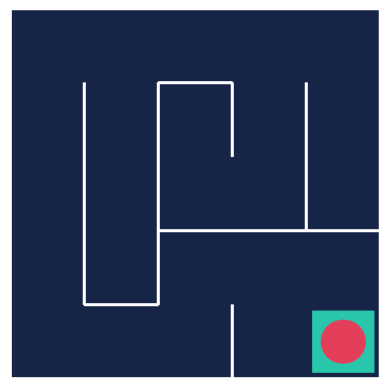

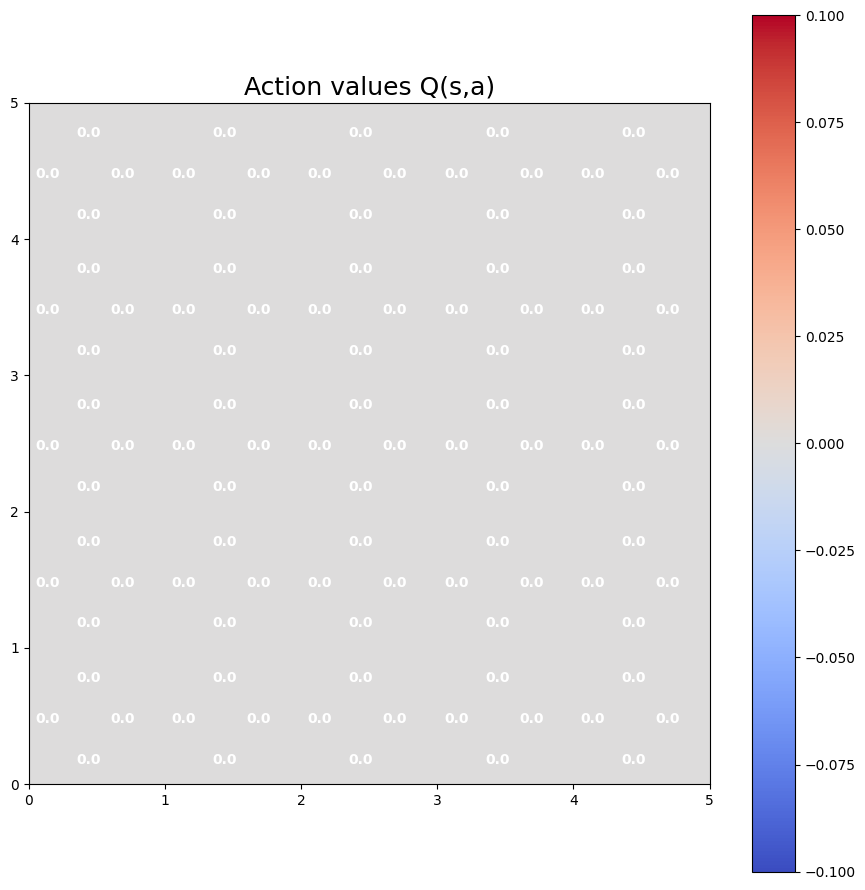

Action taken in state (0,0): 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

env = Maze()

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

print(f'Observation Space: {env.observation_space}')
print(f'Action Space: {env.action_space}')

action_values = np.zeros(shape=(5,5,4))

plot_action_values(action_values)

def policy(state, epsilon=0.):
  if np.random.random() < epsilon:
    return env.action_space.sample()
  else:
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

action = policy((0,0) ,0.2)
print(f'Action taken in state (0,0): {action}')



In [ ]:
def on_policy_mc_control(policy, action_values, episodes, gamma = 0.99, epsilon = 0.2):
  sa_returns = {}

  for episodes in range(1, episodes + 1):
    state = env.reset()
    done = False
    transitions = []

    while not done:
      action = policy(state, epsilon)
      next_state, reward, done, _ = env.step(action)
      transitions.append((state, action, reward))
      state = next_state

    G = 0
    for state_t, action_t, reward_t in reversed(transitions):
      G = gamma * G + reward_t

      if not (state_t, action_t) in sa_returns :
        sa_returns[(state_t, action_t)]=[]
      sa_returns[(state_t, action_t)].append(G)
      action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])

In [ ]:
on_policy_mc_control(policy, action_values, episodes = 10000)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


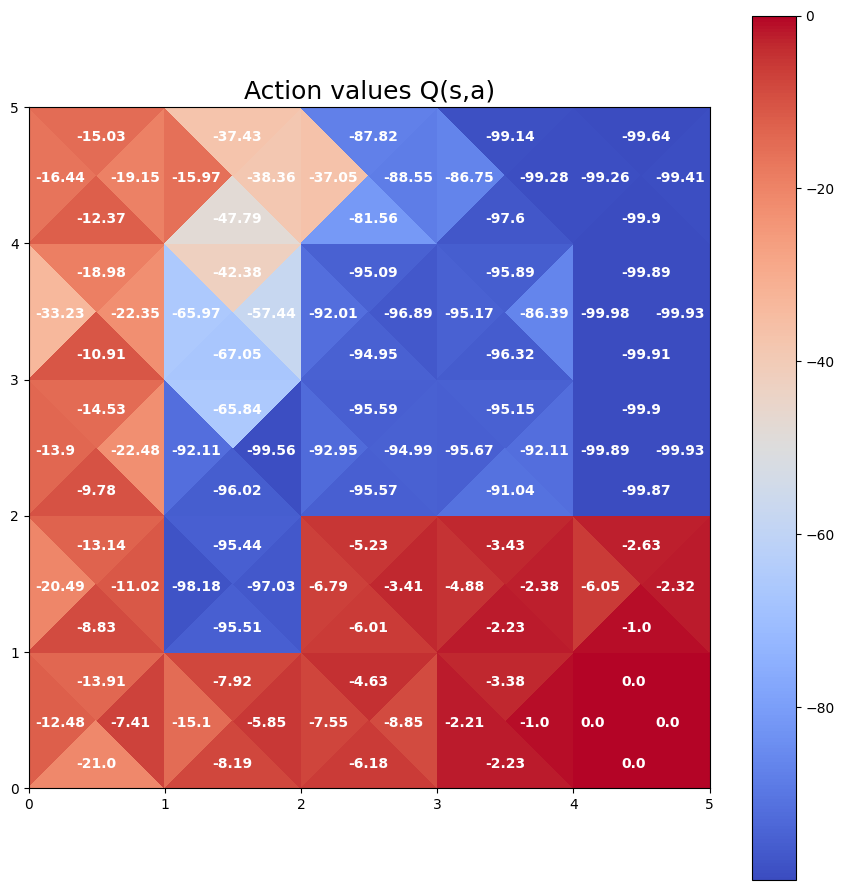

In [ ]:
plot_action_values(action_values)

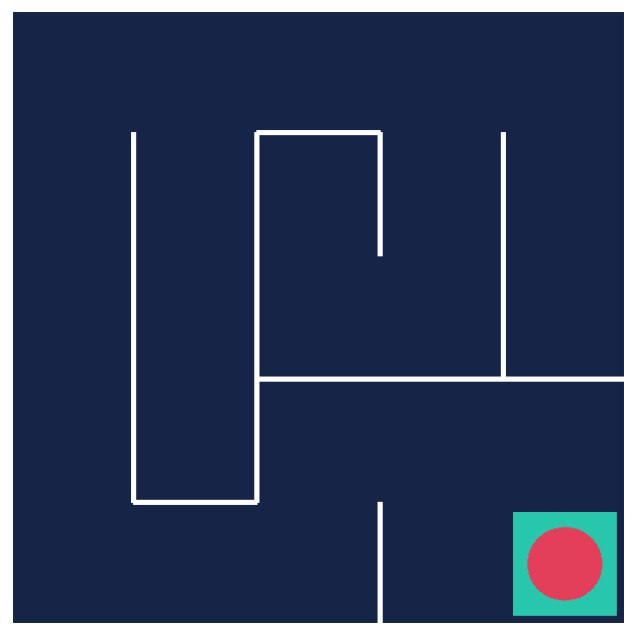

In [ ]:
test_agent(env, policy, episodes = 1)